# Lab3 Logistic Regression
## Elements of Machine Learning 
## José Alejandro Guzmán Zamora 

In [1]:
"""
Libraries I'm going to be using in the lab. Important to 
note that the logistic library contains the implementation
of the Logistic Regression algorithm using Gradient 
Descent and the logisticop library is a module that contains
that same algorithm but using the scipy optimization. 
"""
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import logistic
import logisticop 
from sklearn.model_selection import train_test_split

In [2]:
"""
Reading the dataset and starting to show some initial 
information for the exploration of the data. 
"""
data = pd.read_csv('./heart.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
"""
Data overview. This helps to get a general view of 
some details about the data. Later on I could use the 
value_counts() algorithm to get specific distribution
based on amounts of values used in each column. 
"""
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Dataset Distributions


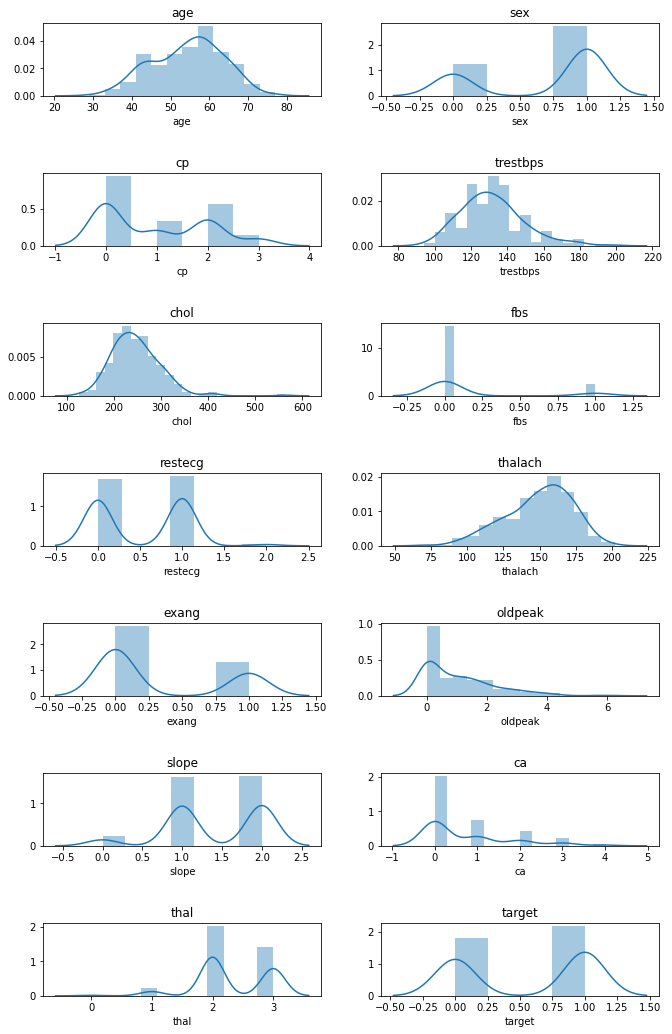

In [4]:
def distribution(data):
    """
    Plots the Distribution of a Dataset. 
    
    Args:
        - data: pandas DataFrame representing the 
        dataset 
    Returns:
        - visualization: distribution of each variable
    """
    axis = []
    cont = 1
    fig = plt.figure(figsize=(10,15))
    for i in data:
        axtemp = fig.add_subplot(7,2,cont)
        fig.tight_layout(pad=3.0)
        sns.distplot(data[i])
        plt.title(i)
        cont += 1
    plt.show()
    
def correlations(data, y):
    """
    Scatter Plots of Variables in Dataset. 
    
    Args:
        - data: pandas Dataframe with the dataset 
        - y: response variable or column 
    Returns:
        - visualization: scatter plot of every 
        variable with the response variable 
    """
    axis = []
    cont = 1
    fig = plt.figure(figsize=(10,10))
    for i in data:
        axtemp = fig.add_subplot(7,2,cont)
        fig.tight_layout(pad=3.0)
        plt.scatter(data[i], data[y])
        plt.title(i)
        cont += 1
    plt.show()

"""
Start off by plotting the distribution of every variable in the 
dataset. We can see the following:
* Age almost represents a normal distribution 
* Trestbps and chol seem like normal distributions with positive
skews 
* thalach is also a pseudo normal distribution but with negative 
skew 
* Oldpeak and ca seem to have logarithmic distributions 
"""

print("Dataset Distributions")
distribution(data)

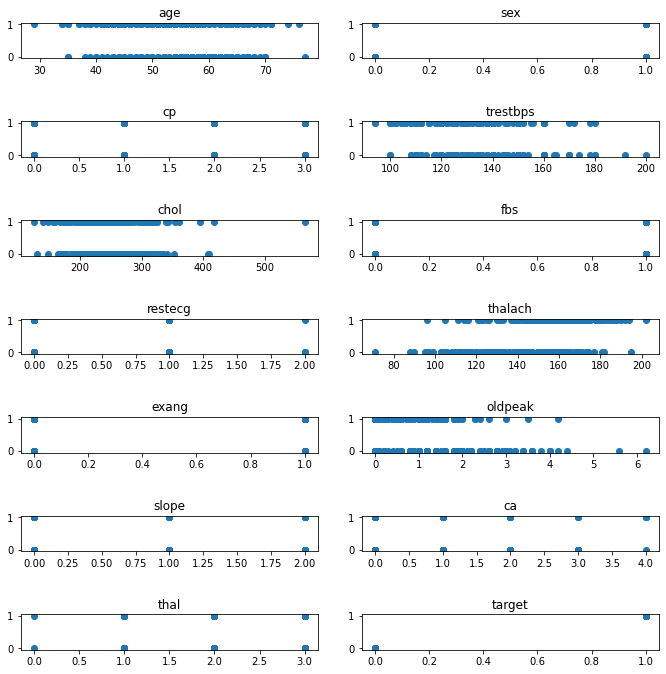

In [5]:
"""
Show the scatter plots of each of the variables vs the 
response variable or target. 
"""

correlations(data, 'target')

In [6]:
"""
In order to start evaluating the models we also have to calculate
the minimum cost of each one. 
"""
def costo_simple(variables, thetas):
    """
    Calculate the Cost of a LR Model.
    
    Args:
        - variables: text of the variables to evaluate 
        - thetas: coefficients 
    returns:
        - cost: total cost of the model 
    """
    ones = np.expand_dims(np.asarray([1 for i in range(len(x_test[variables]))]), 1)
    siguiente = np.expand_dims(x_test[variables], 1)
    entrada = np.hstack([ones, siguiente])
    costo = logistic.cost(entrada, y_test, thetas)
    return costo  

In [7]:
"""
Start with a simple regression model that tries to predict
based only on one variable. 
"""

def simple_regression(equis, ye, variable, metodo=None, alpha=None, it=None):
    """
    Run Logistic Regression based on One Variable. 
    
    Args:
        - equis: DataFrame with all of the columns
        - ye: column with the dependent or response variable 
        - thetas: coefficients to start with 
        - variable: text of the name of the independent 
        variable 
    Returns:
        - res: coefficients of the model 
    """
    limite_inferior = min(equis[variable])
    limite_superior = max(equis[variable])
    x1 = equis[variable]
    y = ye['target']
    unos = np.asarray([1 for i in range(x1.shape[0])])
    xes = np.vstack([unos, x1]).transpose()
    y = np.expand_dims(y,1)
    if metodo is None:
        # Case for manual optimization
        res = logistic.gradient_descent(xes, y, alpha, it)
        res = res[len(res) - 1][0]
    else:
        res = logisticop.optimizar(xes, y, metodo)
    # Continue to setup the plotting 
    xl = np.linspace(limite_inferior - 5,limite_superior + 5,200)
    y = 1 / (1 + (np.e ** -(res[0] + xl * res[1])))
    # Graph 
    print(costo_simple(variable, res))
    plt.scatter(equis[variable], ye['target'])
    plt.plot(xl, y)
    plt.title("Sigmoid Function with " + variable)
    plt.show()
    return res

In [8]:
"""
Split the dataset into the training and testing parts. The proportion
I decided to use is 0.8 for training and 0.2 for testing. 
"""

data_partida = data.copy()
response = pd.DataFrame(data_partida['target'])
xes = data_partida.drop('target', 1)

x_train, x_test, y_train, y_test = train_test_split(xes, response, test_size=0.20, random_state=42)

GRADIENT DESCENT RESULTS
target    0.690703
dtype: float64


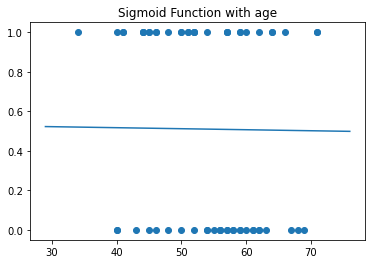

target    0.686662
dtype: float64


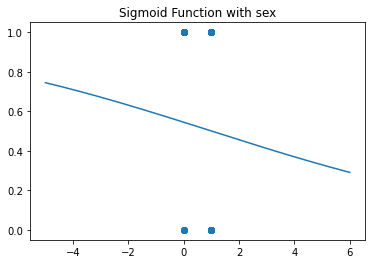

target    0.545263
dtype: float64


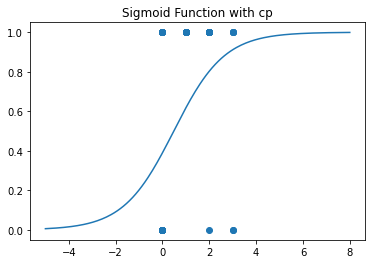

target    2.095186
dtype: float64


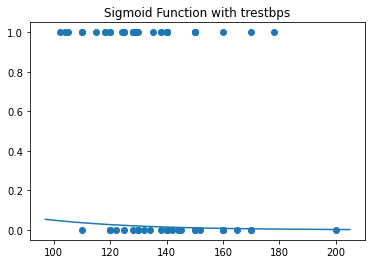

C:\Users\joseg\OneDrive - Universidad Francisco Marroquin\CS7\Elements of Machine Learning\elementsOfMachineLearning\lab3\logistic.py:15: RuntimeWarning: divide by zero encountered in log
  central = (Y * np.log(hips)) + ((1 - Y) * np.log(1 - hips))


target    2.54722
dtype: float64


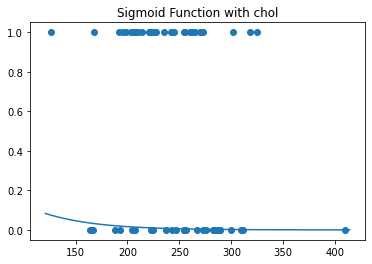

target    0.689058
dtype: float64


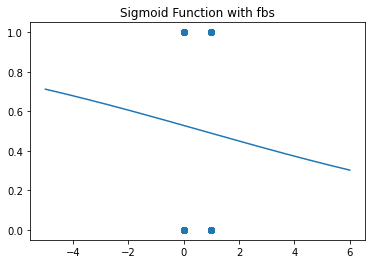

target    0.649503
dtype: float64


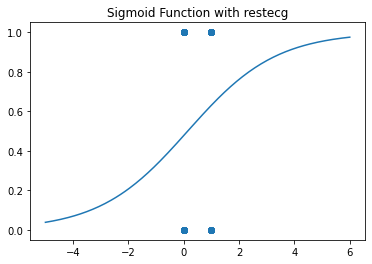

target    0.896943
dtype: float64


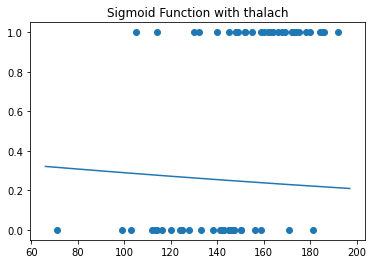

target    0.638955
dtype: float64


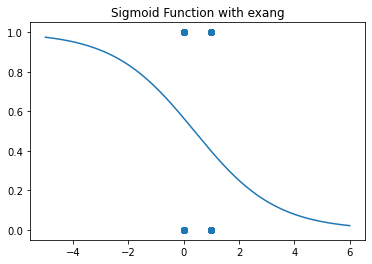

target    0.617627
dtype: float64


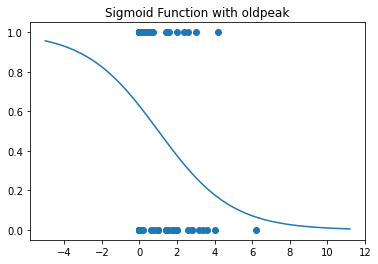

target    0.653865
dtype: float64


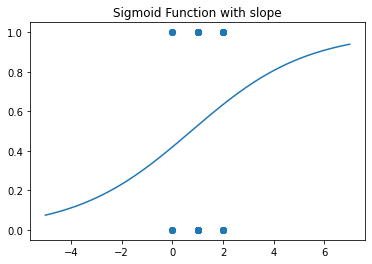

target    0.591457
dtype: float64


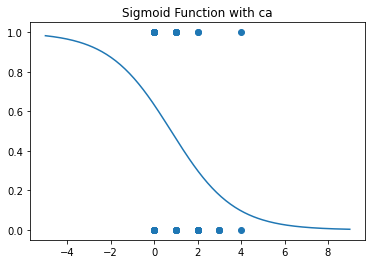

target    0.67356
dtype: float64


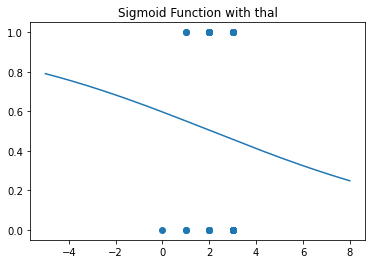

TNC RESULTS
target    0.692979
dtype: float64


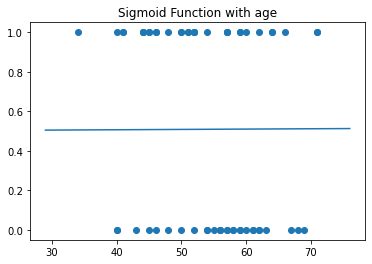

target    0.686847
dtype: float64


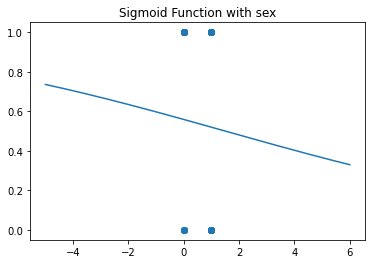

target    0.671655
dtype: float64


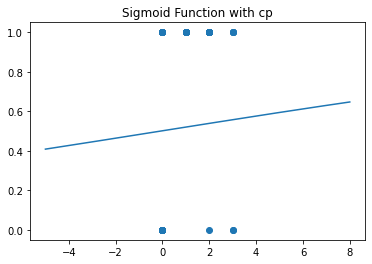

target    0.693101
dtype: float64


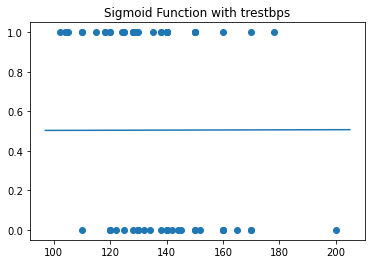

target    0.693113
dtype: float64


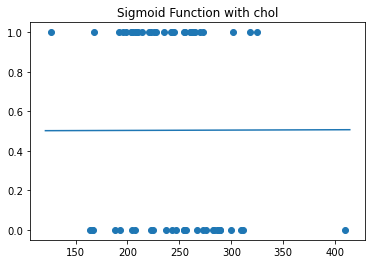

target    0.689973
dtype: float64


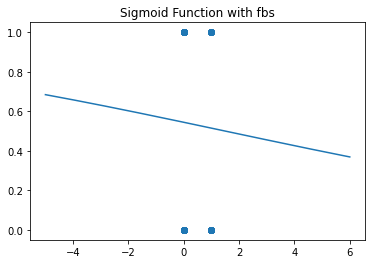

target    0.679528
dtype: float64


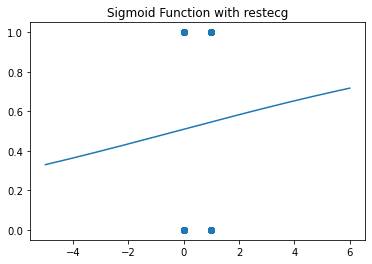

target    0.686302
dtype: float64


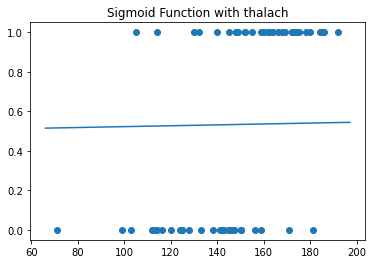

target    0.693147
dtype: float64


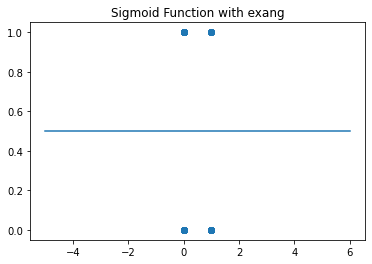

target    0.693147
dtype: float64


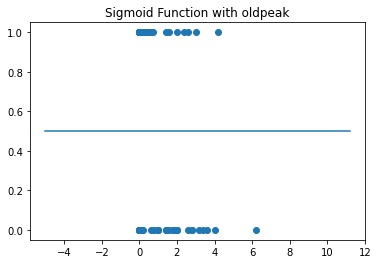

target    0.685396
dtype: float64


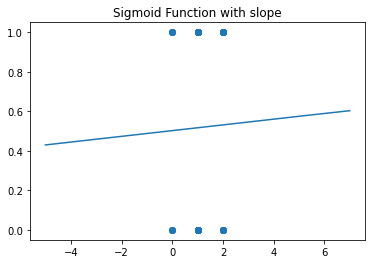

target    0.693147
dtype: float64


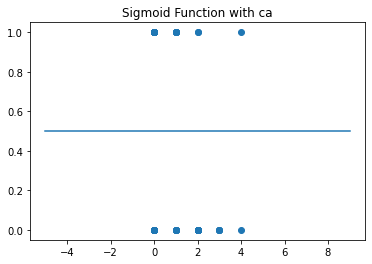

target    0.693147
dtype: float64


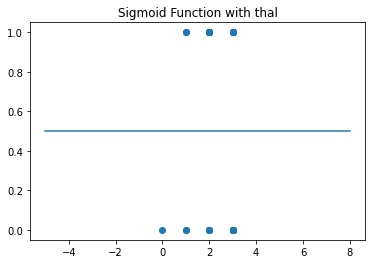

In [9]:
"""
Run the algorithm on all of the variables and start comparing 
the costs of each one. We have two options, doing it by gradient descent
or by the advanced optimization algorithms of BFGS, LBFGSB or TNC. The 
tradeoff is time, gradient descent is much slower; but we have to 
compare the results. 
"""

resultados_gd = []
resultados_tnc = []

"""
These loops can be done all in one, but Im doing them separate for
visualization purposes. 
"""
print("GRADIENT DESCENT RESULTS")
for i in x_test:
    resultados_gd.append((simple_regression(x_test, y_test, i, alpha=0.001, it=10000), i))
    
print("TNC RESULTS")
for i in x_test:
    resultados_tnc.append((simple_regression(x_test, y_test, i, metodo='TNC'), i))

In [10]:
"""
We can notice from the graphs above that the gradient descent algorithm 
managed to reach lower costs, but with 10,000 iterations. Now we have to 
compare some more metrics before jumping into conclusions. 
"""

'\nWe can notice from the graphs above that the gradient descent algorithm \nmanaged to reach lower costs, but with 10,000 iterations. Now we have to \ncompare some more metrics before jumping into conclusions. \n'

In [11]:
"""
Piece of code to calculate the confusion matrix of each variable. 
"""
import sklearn.metrics as m

def c_matrix(thetast, variable):
    """
    Calculate Confusion Matrix. 
    
    Args:
        - variable: the text or list of variables to take into account 
        - thetast: the coefficients 
    Returns:
        - Confusion Matrix 
    """
    unitos = np.asarray([1 for i in range(len(x_test))]).reshape(len(x_test), 1)
    if isinstance(variable, str):
        siguiente = np.expand_dims(x_test[variable],1)
    else:
        siguiente = x_test[variable]
    unidos = np.hstack([unitos,siguiente]) 
    hipotesis_prueba = logisticop.logistic(unidos, thetast)
    resultado_temp = [1 if i >= 0.5 else 0 for i in hipotesis_prueba]
    return m.confusion_matrix(y_test, resultado_temp)

In [12]:
"""
Get some insights from the correlation matrices. 
"""

"""
Recall shows the proportion of the actual positive class that we got correct. 
The higher the value the better. 
"""
def recall(mat):
    return mat[0][0] / (mat[0][0] + mat[1][0])

"""
Precision shows the proportion of positive predictions that are actually 
positive, this number should also be high. 
"""
def precision(mat):
    return mat[0][0] / (mat[0][0] + mat[0][1])

"""
General proportion of correct ones. Should be aiming for 1. 
"""
def accuracy(mat):
    return (mat[0][0] + mat[1][1]) / sum(sum(mat))

In [13]:
"""
Run the matrix insights on both methos and sum all of them 
to get the variables that are the most accurate and precise. 
In this case the results from the TNC optimization are not 
usefull because the coefficients are so small that the models 
defaults to clasify 1 in most of the cases. We are going to 
continue with Gradient Descent. 
"""

matrices_gd = []
matrices_tnc = []
for i in range(len(resultados_gd)):
    matriz1 = c_matrix(resultados_gd[i][0],resultados_gd[i][1])
    total1 = recall(matriz1) + precision(matriz1) + accuracy(matriz1)
    matrices_gd.append((total1, resultados_gd[i][1]))
    matriz2 = c_matrix(resultados_tnc[i][0],resultados_tnc[i][1])
    total2 = recall(matriz2) + precision(matriz2) + accuracy(matriz2)
    matrices_tnc.append((total2, resultados_tnc[i][1]))
    
mejores_gd = sorted(matrices_gd, reverse=True)
mejores_tnc = sorted(matrices_tnc, reverse=True)

c:\users\joseg\onedrive - universidad francisco marroquin\cs7\env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in longlong_scalars
  # Remove the CWD from sys.path while we load stuff.


In [14]:
"""
Ignoring the nan for both age and sex, the top 5 variables for the 
simple logistic regression were cp or chest pain type, thal for defects
ca or number of major vessels colored by flourosopy, restrcg or 
resting electrocardiographic results and exang for exercise induced angina. 
We are going to consider these variables for the multiple variable test. 
"""

print("Variables from Best to Worst")
print(mejores_gd)

best = ['cp', 'thal', 'ca', 'restecg', 'exang', 'oldpeak']

Variables from Best to Worst
[(nan, 'age'), (nan, 'sex'), (2.5204960857872107, 'cp'), (2.3312202212710975, 'thal'), (2.145449406444319, 'ca'), (2.0593232657675844, 'restecg'), (2.030255364121218, 'exang'), (1.983064820048992, 'oldpeak'), (1.9508196721311473, 'trestbps'), (1.9508196721311473, 'thalach'), (1.9508196721311473, 'chol'), (1.4046676895744166, 'fbs'), (1.1280384397964953, 'slope')]


In [15]:
"""
Now we are going to start making multiple variables tests. Lets start with 
considering every best variable. 
"""

def prueba_multiple(equis, ye, variables, alpha, it):
    """
    Linear Regression for Multiple Independent Variables. 
    """
    x1 = equis[variables]
    y = ye['target']
    thetas = np.expand_dims(np.asarray([0 for i in range(len(variables) + 1)], dtype='float64'),1)
    unos = np.expand_dims(np.asarray([1 for i in range(x1.shape[0])]),1)
    xes = np.hstack([unos, x1])
    y = np.expand_dims(y,1)
    res = logistic.gradient_descent(xes, y, alpha, it)
    return res

primer_resultado = prueba_multiple(x_train, y_train, best, 0.001, 1000)
primer_resultado = primer_resultado[len(primer_resultado) - 1][0]
first_m = (c_matrix(primer_resultado, best))
first_a = accuracy(first_m)
first_p = precision(first_m)
first_r = recall(first_m)
print("Acurracy:", first_a)
print("Precision", first_p)
print("Recall", first_r)
print("SUM:")
print(first_a + first_p + first_r)

"""
As we can see, we are getting better results with more variables. 
"""

Acurracy: 0.8852459016393442
Precision 0.896551724137931
Recall 0.8666666666666667
SUM:
2.648464292443942


'\nAs we can see, we are getting better results with more variables. \n'

In [16]:
"""
In order to get objective results, we are going to test models for every
combination of the best variables found in the last few cells. 
"""

import itertools
test = list(itertools.combinations(best, 5))
test1 = list(itertools.combinations(best, 4))
test2 = list(itertools.combinations(best, 3))
test3 = list(itertools.combinations(best, 2))
total = test + test1 + test2 + test3

"""
Run the algorithm on all combinations. 
"""

all_res = []
for i in total:
    tmp = prueba_multiple(x_train, y_train, list(i), 0.001, 1000)
    all_res.append((c_matrix(tmp[len(tmp) - 1][0], list(i)), list(i)))

In [17]:
"""
We now have all computed matrices from the models in the all_res list, 
now its finally time to test them all and see which one is better. 
"""

accuracies = [(accuracy(i[0]), i[1]) for i in all_res]
print(sorted(accuracies, reverse=True))

[(0.9016393442622951, ['cp', 'thal', 'ca', 'restecg', 'oldpeak']), (0.9016393442622951, ['cp', 'ca', 'restecg', 'oldpeak']), (0.8852459016393442, ['cp', 'thal', 'ca', 'exang', 'oldpeak']), (0.8688524590163934, ['cp', 'thal', 'ca', 'oldpeak']), (0.8688524590163934, ['cp', 'ca', 'restecg', 'exang', 'oldpeak']), (0.8688524590163934, ['cp', 'ca', 'oldpeak']), (0.8524590163934426, ['cp', 'thal', 'restecg', 'oldpeak']), (0.8524590163934426, ['cp', 'thal', 'restecg', 'exang']), (0.8524590163934426, ['cp', 'thal', 'ca', 'exang']), (0.8360655737704918, ['cp', 'thal', 'restecg', 'exang', 'oldpeak']), (0.8360655737704918, ['cp', 'thal', 'restecg']), (0.8360655737704918, ['cp', 'thal', 'exang']), (0.8360655737704918, ['cp', 'restecg', 'oldpeak']), (0.8360655737704918, ['cp', 'restecg', 'exang', 'oldpeak']), (0.8360655737704918, ['cp', 'ca', 'exang', 'oldpeak']), (0.819672131147541, ['cp', 'thal', 'exang', 'oldpeak']), (0.819672131147541, ['cp', 'thal', 'ca']), (0.819672131147541, ['cp', 'thal']), 

# Conclusion
And we found it... the combination of variables that yields the best accuracy 
is 'cp', 'thal', 'ca', 'restecg' and 'oldpeak'. In terms of the models used, we first 
saw that the method of gradient descent is good enough for this case. The negative 
detail about this method is the large amount of iterations we have to go through to get 
a descent model. However, when trying the scipy optimization methods, none of them 
seemed to apply correctly to this dataset. After doing the simple logistic regression, 
we got the top 6 variables that predicted the outcome into consideration for the multiple 
logistic regression model. After some trial and error we found that the combination mentioned
above achieved an accurracy of 90% for this dataset, which personally is an acceptable value. 
Considering the meaning of the variables, we could conclude that every person that has done 
heart dieseases exams recentrly should check for chest pain type, the reversible effects,
the resting electocardiogram results and the ST depression induced by exercise. As we can see,
using all the posible variables in the model is not always the best method, you have to choose 
your features wisely. 